

$$\textbf{Attention!!!}$$
This Notebook has been run on Google Colab. If you are willing to run the notebook on your personal compoter some changes as such data repository locationas must be changed





# Home Assignment No. 2: Part 2 (Practice)
To solve this task, you will write a lot of code to try several machine learning methods for classification and regression.
* You are **HIGHLY RECOMMENDED** to read relevant documentation, e.g. for [python](https://docs.python.org/3/), [numpy](https://docs.scipy.org/doc/numpy/reference/), [matlpotlib](https://matplotlib.org/) and [sklearn](https://scikit-learn.org/stable/). Also remember that seminars, lecture slides, [Google](http://google.com) and [StackOverflow](https://stackoverflow.com/) are your close friends during this course (and, probably, whole life?).

* If you want an easy life, you have to use **BUILT-IN METHODS** of `sklearn` library instead of writing tons of our yown code. There exists a class/method for almost everything you can imagine (related to this homework).

* To do this part of homework, you have to write **CODE** directly inside specified places inside notebook **CELLS**.

* In some problems you may be asked to provide short discussion of the results. In this cases you have to create **MARKDOWN** cell with your comments right after the your code cell.

* For every separate problem you can get only 0 points or maximal points for this problem. There are **NO INTERMEDIATE scores**. So make sure that you did everything required in the task

* Your **SOLUTION** notebook **MUST BE REPRODUCIBLE**, i.e. if the reviewer decides to execute `Kernel` -> `Restart Kernel and Run All Cells`, after all the computation he will obtain exactly the same solution (with all the corresponding plots) as in your uploaded notebook. For this purpose, we suggest to fix random `seed` or (better) define `random_state=` inside every algorithm that uses some pseudorandomness.

* Your code must be clear to the reviewer. For this purpose, try to include neccessary comments inside the code. But remember: **GOOD CODE MUST BE SELF-EXPLANATORY** without any additional comments.

Before the start, read several additional recommendations.
* Probably you lauch `jupyter notebook` or `ipython notebook` from linux console. Try `jupyter lab` instead - it is a more convenient environment to work with notebooks.
* Probably the PC on which you are going to evaluate models has limited CPU/RAM Memory. In this case, we recommend to monitor the CPU and Memory Usage. To do this, you can execute `htop` (for CPU/RAM) or `free -s 0.2` (for RAM) in terminal.
* Probably tou have multiple Cores (CPU) on your PC. Many `sklearn` algorithms support multithreading (Ensemble Methods, Cross-Validation, etc.). Check if the particular algorithm has `n_jobs` parameters and set it to `-1` to use all the cores.

## Task 1. Deep ANNs. (5 points)

### Task 1.1.  Activation functions. (1 point)


Plot the following [activation functions](https://pytorch.org/docs/master/nn.html#non-linear-activation-functions) using their PyTorch realizations and their derivatives using autograd functionality `grad()`:
   
1. **(1 pt.)** Plot `ReLU`, `ELU` ($\alpha = 1$), `Softplus` ($\beta = 1$) and `Sign`, `Sigmoid`, `Softsign`, `Tanh`.
Which of these functions may be, and which - definitely, are a poor choise as an activation function in a neural network? Why?

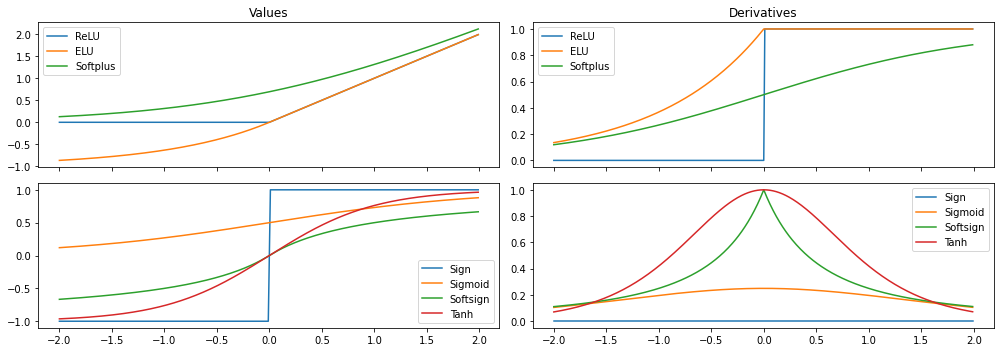

In [93]:
%matplotlib inline
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch

x = torch.arange(-2, 2, .01, requires_grad=True)
x_np = x.detach().numpy()
x.sum().backward() # to create x.grad


f, axes = plt.subplots(2, 2, sharex=True, figsize=(14, 5))
axes[0, 0].set_title('Values')
axes[0, 1].set_title('Derivatives')

for i, function_set in (0, (('ReLU', F.relu), ('ELU', F.elu), ('Softplus', F.softplus))), \
                       (1, (('Sign', torch.sign), ('Sigmoid', torch.sigmoid), ('Softsign', F.softsign), ('Tanh', torch.tanh))):
    for function_name, activation in function_set:
        ### BEGIN Solution
            # >>> your solution here <<<
        x.grad.zero_()
        values = activation(x)
        axes[i,0].plot(x_np,values.detach().numpy(),label=function_name)
        values.backward(torch.ones(len(x_np)))
        axes[i,1].plot(x_np,x.grad.detach().numpy(),label=function_name)
        ### END Solution
  
    axes[i, 0].legend()
    axes[i, 1].legend()

plt.tight_layout()
plt.show()

**Discussion**

* **Sigmoid** - Sigmoid although smooth and easy to computer gardient, it has saturational nature. When an output the sigmoid is close to zero or one, then it's gradiest will also be equal to number close to zeros. This is a bad thing since the local gradient of the fuction must be multiplied with backstreem of the gradients coming from backprogation. **Poor choise**


* **Tanh** - Tanh non-linearity squashes a real-valued number on to renge(-1,1). Just like Sigmoid, it's outputs saturete, but unlike sigmoid Tanh has nice property which is it's outputs are zero centered. This is good property for backpropogation algorithm. **Not bad, but the best**


* **ReLU( Rectified Linear Unit )** - It's shown that this activation speeds up convergence by a factor of 6 [Krizhevsky et al.](http://www.cs.toronto.edu/~fritz/absps/imagenet.pdf), thus ReLU is widely used for NN. It's very easy to compute. One of the drowbacks of ReLU is that it might 'die' if learning rate is set to high number and it might never activate again. If learning reate is chosen wisely, this problem can be mitigated to some extent. **Good choise**


* **Leaky ReLU** - This activation fuction has been introduced to mitigate neurons 'diying' problem in ReLU(), since it's produces small negative numbers even when input is smaller than zero. **Not bad, but tricky**


* **Sign** -  Is a very bad choise as an activation fucition, becasue it derivative is always zero.


* **Softsign** - very similar to **Tanh**


* **Softplus** - Has very good properties of it's derivatives. I would consider it to be a **good choise**, although computationaly less competitive to **ReLU**

### Task 1.2. MNIST classification. (4 points)

At the **[Seminar 13](https://github.com/adasegroup/ML2020_seminars/tree/master/seminar12)** on neural networks, we designed an MLP (Multilayer perceptron) with one hidden layer using our numpy implementations of linear layer, logistic and softmax activation functions. In this task, you are to

1. **(1 pt.)** Implement the MLP modules, including the Softmax cross entropy between `logits` and `labels`.
2. **(2 pt.)** Train our numpy realization of MLP to classify the MNIST from `sklearn.datasets()`. The required accuracy on validation is `> 90%`.
3. **(1 pt.)** Compare the acccuracy of classification to your scores from `Part 1` with and without dimensionality reduction. Is this comparison fair? :) Derive the confusion matrix for all digits classes. Which digits are predicted better or worse than others?



In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [0]:
# fetch the dataset.
digits, targets = load_digits(return_X_y=True)
digits = digits.astype(np.float32) / 255

digits_train, digits_test, targets_train, targets_test = train_test_split(digits, targets, random_state=0)

train_size = digits_train.shape[0]

input_size = 8*8
classes_n = 10

In [96]:
digits.shape

(1797, 64)

In [97]:
targets_train

array([2, 8, 9, ..., 7, 7, 8])

**Implement the MLP with backprop.**

In [0]:
class Linear:
    def __init__(self, input_size, output_size):
        self.thetas = np.random.randn(input_size, output_size)
        self.thetas_grads = np.empty_like(self.thetas)
        self.bias = np.random.randn(output_size)
        self.bias_grads = np.empty_like(self.bias)

    def forward(self, x): 
        output = np.matmul(x, self.thetas) + self.bias
        return output
    
    def backward(self, x, output_grad):
        ### BEGIN Solution
        # ... calculate grads
        input_grad = output_grad@self.thetas.T
        self.thetas_grads += x.reshape(-1,1)@output_grad
        self.bias_grads   += np.sum(output_grad)
        ### END Solution
        return input_grad

class LogisticActivation:
    def forward(self, x):
        output = 1/(1 + np.exp(-x))
        return output


    def backward(self, x, output_grad):
        ### BEGIN Solution
        input_grad = self.forward(x)*(1-self.forward(x))*output_grad
        ### END Solution
        
        return input_grad


class MLP:
    def __init__(self, input_size, hidden_layer_size, output_size):
        self.linear1 = Linear(input_size, hidden_layer_size)
        self.activation1 = LogisticActivation()
        self.linear2 = Linear(hidden_layer_size, output_size)
        
    
    def forward(self, x):
        return self.linear2.forward(self.activation1.forward(self.linear1.forward(x)))

    def backward(self, x, output_grad):
        ### BEGIN Solution
        first = self.linear1.forward(x)
        second = self.activation1.forward(first)
        third = self.linear2.forward(second)
        
        d1 = self.linear2.backward(second,output_grad)
        d2 = self.activation1.backward(first,d1)
        d3 = self.linear1.backward(x,d2)
        ### END Solution
        pass

In [0]:
### BEGIN Solution
def softmax_crossentropy_with_logits(logits, reference_answers):
  #softmax
  logits-= np.max(logits,axis=1)
  p = np.exp(logits)/np.sum(np.exp(logits),axis=1)
  
  #cross entropy
  #   entropy = -np.sum(reference_answers*np.log(p),axis=1)
  m = reference_answers.shape[0]
  entropy = -np.log(p[range(m),reference_answers])
  return np.mean(entropy)


def grad_softmax_crossentropy_with_logits(logits, reference_answers):
  
  m = reference_answers.shape[0]
  logits-= np.max(logits,axis=1)
  grad = np.exp(logits)/np.sum(np.exp(logits),axis=1)
  grad[range(m),reference_answers] -= 1
  return grad/m

### END Solution

In [100]:
np.random.seed(42)

mlp = MLP(input_size=input_size, hidden_layer_size=100, output_size=classes_n)

epochs_n = 100
learning_curve = [0] * epochs_n
test_curve = [0] * epochs_n

x_train = digits_train
x_test = digits_test
y_train = targets_train
y_test = targets_test

test_size = digits_test.shape[0]

learning_rate = 1e-2

for epoch in range(epochs_n):
        
    for sample_i in range(train_size):
        x = x_train[sample_i].reshape((1, -1))
        target = np.array([y_train[sample_i]])

        ### BEGIN Solution
        # ... zero the gradients -- change += to =

        # >>> your solution here <<<
        mlp.linear1.thetas_grads = 0
        mlp.linear1.bias_grads   = 0
        mlp.linear2.thetas_grads = 0
        mlp.linear2.bias_grads   = 0

        # ... perform backward pass
        # ... update the weights simply with weight -= grad * learning_rate
        
        # >>> your solution here <<<
        #forward pass
        pred = mlp.forward(x)
        loss_train = softmax_crossentropy_with_logits(pred,target)
        learning_curve[epoch] += loss_train
        #backward pass
        grad = grad_softmax_crossentropy_with_logits(pred,target)
        mlp.backward(x,grad)
        #parameter update
        mlp.linear1.thetas -= learning_rate*mlp.linear1.thetas_grads
        mlp.linear2.thetas -= learning_rate*mlp.linear2.thetas_grads
        mlp.linear1.bias   -= learning_rate*mlp.linear1.bias_grads
        mlp.linear2.bias   -= learning_rate*mlp.linear2.bias_grads
        
    test_acc = []
    for test_sample in range(test_size):
        x = x_test[test_sample].reshape((1, -1))
        target = np.array([y_test[test_sample]])
        pred = mlp.forward(x)
        loss_test = softmax_crossentropy_with_logits(pred,target)
        test_curve[epoch] += loss_test
        test_acc.append(np.argmax(pred))
    
    if epoch % 10 == 0:
        acc = accuracy_score(y_test,np.array(test_acc))
        print('Starting epoch {}'.format(epoch),', Accuracy on test: ', acc)

    ### END Solution

Starting epoch 0 , Accuracy on test:  0.1111111111111111
Starting epoch 10 , Accuracy on test:  0.64
Starting epoch 20 , Accuracy on test:  0.8066666666666666
Starting epoch 30 , Accuracy on test:  0.86
Starting epoch 40 , Accuracy on test:  0.8844444444444445
Starting epoch 50 , Accuracy on test:  0.9088888888888889
Starting epoch 60 , Accuracy on test:  0.92
Starting epoch 70 , Accuracy on test:  0.9222222222222223
Starting epoch 80 , Accuracy on test:  0.9244444444444444
Starting epoch 90 , Accuracy on test:  0.9244444444444444


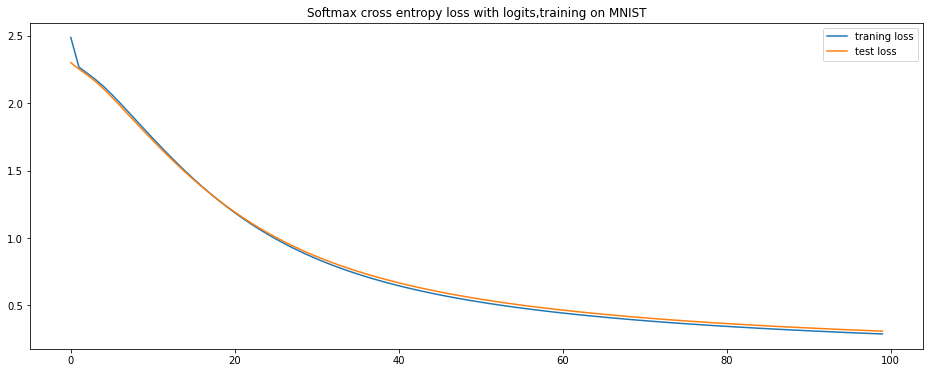

In [101]:
plt.figure(figsize=(16,6))
plt.plot(range(epochs_n),np.array(learning_curve)/train_size,label='traning loss')
plt.plot(range(epochs_n),np.array(test_curve)/test_size,label='test loss')
plt.title("Softmax cross entropy loss with logits,training on MNIST")
plt.legend();

In [102]:
# confusion matrix
pred = np.argmax(mlp.forward(digits),axis=1)
pd.DataFrame(confusion_matrix(targets,pred))
# >>> your solution here <<<

0    1    2    3    4    5    6    7    8    9
0  176    0    0    0    1    0    1    0    0    0
1    0  160    4    0    0    0    2    0    4   12
2    0    4  170    2    0    0    0    1    0    0
3    0    1    4  171    0    2    0    3    1    1
4    0    0    0    0  176    0    0    4    0    1
5    0    0    0    0    1  172    1    0    0    8
6    1    2    0    0    1    0  177    0    0    0
7    0    0    0    0    0    0    0  178    0    1
8    0   14    2    1    1    4    1    3  145    3
9    0    2    0    6    2    3    0    4    3  160


**Discussion**
 * At the end of `part1` we have calculated accuracies of digits classifications with different dimentionality reduction compoinests using PCA metod. Firstly, PCA can not be compared to NN based dimentionality reduction methods due to the nature of the methods and thus comparing the classification accuracies would `not be very fair`. Nevertheless, us do it here:
      1. The best accuracy usign KNN(neibours=2 )in PCA(compoinest=100) was `93`
      2. The best accuracy using MLP(2 layers) is `92`

* In the `part1` without dimentionality reduction the best accuracy was around `91` which is even worce than with dimentionality reduction

* If we have a look at the above confusion matrix we can see that most of the times number 9 was missclassified as 1 and 8 as 2. Best classification recieved number 7. I believe if we used some convolutional layer those results could have been made even better 



## Task 2. Autoencoders. (7 points)

### Task 2.1.  Autoencoder on the tabular data. (3 points)


We will build a latent representation for tabular data with simple Autoencoder (AE). We are going to work with the cancer dataset from scikit-learn package. You are to follow the instructions `1.0 - 1.6`.  

1. **(1 pt.)** Implement AE modules;
2. **(2 pt.)** Train AE to get latent representation of the cancer dataset from `sklearn.datasets()`. Use `MSE` loss and get < $0.28$ on validation, with AE "bottleneck" = $2$;
3. **(1 pt.)** Plot the latent representation of whole dataset in 2D, use colors to show object of differneet classes;


In [0]:
# imports
import sklearn.datasets as sk_data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.utils.data as torch_data

#### 1.0 Featch the data. Scale it and split on train and test.

In [137]:
cancer_dset = sk_data.load_breast_cancer()

X = StandardScaler().fit_transform(cancer_dset['data'])

print('Features: ', list(cancer_dset['feature_names']))
print('\nShape:', X.shape)

X_train, X_val, y_train, y_val = train_test_split(X, cancer_dset['target'], test_size=0.2, random_state=42)
print('\nTrain size: ', len(X_train))
print('Validation size: ', len(X_val))

Features:  ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']

Shape: (569, 30)

Train size:  455
Validation size:  114


In [138]:
type(X_train)

numpy.ndarray

#### 1.1 Let us firtly make the dataset, which we'll be able to use with pytorch dataloader. 
Implement the `__len__` and `__getitem__` methods.

In [0]:
class CancerData(torch_data.Dataset):
    def __init__(self, X, y):
        super(CancerData, self).__init__()   # why to call the class itself in the super??
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)
    
    def __len__(self):
        return self.X.shape[0] # >>> your solution here <<<
    
    def __getitem__(self, idx):
        return (self.X[idx], self.y[idx]) # >>> your solution here <<<


In [140]:
train_dset = CancerData(X_train, y_train) 
type(train_dset)

__main__.CancerData

In [141]:
train_dset = CancerData(X_train, y_train) 
val_dset = CancerData(X_val, y_val) 

print(train_dset[5])

(tensor([ 0.1172,  1.9199,  0.1961,  0.0111,  1.2482,  1.0453,  0.9429,  0.6376,
         1.7940,  1.1302, -0.1269, -0.3336,  0.0064, -0.1713, -0.4780,  0.9458,
         0.5145, -0.1454, -0.2388,  0.6321,  0.2466,  1.8650,  0.5016,  0.1101,
         1.5532,  2.5664,  2.0649,  0.8617,  2.1310,  2.7793]), tensor(0.))


#### 1.2 Now, we'll be making a base class for out autoencoder. 
It takes as input encoder and decoder (it will be two neural networks). Using this two oblects, your task is to implement the forward pass.

In [0]:
class MyFirstAE(nn.Module):
    def __init__(self, encoder, decoder):
        super(MyFirstAE, self).__init__()
        self.encoder = encoder
        self.decoder = decoder
    
    def forward(self, x):
        """
        Take a mini-batch as an input, encode it to the latent space and decode back to the original space
        x_out = decoder(encoder(x))
        :param x: torch.tensor, (MB, x_dim)
        :return: torch.tensor, (MB, x_dim)
        """
        z = self.encoder(x)
        # print(z.shape)
        x_out = self.decoder(z)
        # print(x_out.shape)
        return x_out # >>> your solution here <<<

#### 1.3 It is time to create neural networks for encoder an decoder networks.
Make hidden size of the network to be equal to `2`.

**Hint.** You can use `nn.Sequential` to create your archtectures.

In [0]:
encoder = lambda hid: nn.Sequential(
  nn.Linear(30,20,bias=True),
  nn.BatchNorm1d(20),
  nn.ReLU(),
  nn.Linear(20,10,bias=True),
  nn.BatchNorm1d(10),
  nn.ReLU(),
  nn.Linear(10,hid,bias=True),
  )  


decoder = lambda hid: nn.Sequential(
  nn.Linear(hid,10,bias=True),
  nn.BatchNorm1d(10),
  nn.ReLU(),
  nn.Linear(10,20,bias=True),
  nn.BatchNorm1d(20),
  nn.ReLU(),
  nn.Linear(20,30,bias=True),
  )

In [0]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') # >>> your solution here <<<

net = MyFirstAE(encoder(2), decoder(2))  
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(),lr=0.02)               
# scheduler = torch.optim.lr_scheduler.StepLR(optimizer,step_size=5,gamma=0.1)
# scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=(100, ), gamma=.1)
scheduler =  None

train_loader = torch_data.DataLoader(train_dset, batch_size=100, shuffle=True) 
val_loader = torch_data.DataLoader(val_dset, batch_size=200, shuffle=False) 

#### 1.4 Implement the missing parts in the `train` function

In [0]:
def train(epochs, net, criterion, optimizer, train_loader, val_loader,scheduler=None, verbose=True, save_dir=None):
    net.to(device)
    for epoch in range(1, epochs+1):
        net.train()
        for X, _ in train_loader:
            # >>> your solution here <<<
            X = X.to(device)
            tr_pred = net(X)
            loss = criterion(tr_pred,X)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
        # defining NN evaluation
        net.eval()
        for X, _ in val_loader:
            X = X.to(device)
            val_pred = net(X)
            val_loss = criterion(val_pred,X)
             # >>> your solution here <<<
         
        if scheduler is not None:
            scheduler.step()
        freq = max(epochs//20,1)
        if verbose and epoch%freq==0:
            print('Epoch {}/{} || Loss:  Train {:.4f} | Validation {:.4f}'.format(epoch, epochs, loss.item(), val_loss.item()))

#### 1.5 Train your AE on breast cancer dataset. 
Your goal is to get validation error < that 0.3.

Some feartures that mey help you to improve performance:
* `Dropout`
* `Batchnorm`
* lr scheduler (e.g. reduce learning)
* Batch size

In [156]:
# for `MSE` loss get < 0.28 on validation, with AE "bottleneck" = 2
train(100, net, criterion, optimizer, train_loader, val_loader, scheduler) 

Epoch 5/100 || Loss:  Train 0.4388 | Validation 0.4389
Epoch 10/100 || Loss:  Train 0.3786 | Validation 0.3390
Epoch 15/100 || Loss:  Train 0.3508 | Validation 0.3151
Epoch 20/100 || Loss:  Train 0.3558 | Validation 0.3121
Epoch 25/100 || Loss:  Train 0.4011 | Validation 0.3018
Epoch 30/100 || Loss:  Train 0.3291 | Validation 0.2982
Epoch 35/100 || Loss:  Train 0.2933 | Validation 0.2837
Epoch 40/100 || Loss:  Train 0.2732 | Validation 0.2896
Epoch 45/100 || Loss:  Train 0.2908 | Validation 0.2834
Epoch 50/100 || Loss:  Train 0.2801 | Validation 0.2824
Epoch 55/100 || Loss:  Train 0.2939 | Validation 0.2766
Epoch 60/100 || Loss:  Train 0.2473 | Validation 0.2794
Epoch 65/100 || Loss:  Train 0.3014 | Validation 0.2741
Epoch 70/100 || Loss:  Train 0.2880 | Validation 0.2792
Epoch 75/100 || Loss:  Train 0.2759 | Validation 0.2772
Epoch 80/100 || Loss:  Train 0.3098 | Validation 0.2853
Epoch 85/100 || Loss:  Train 0.2692 | Validation 0.2813
Epoch 90/100 || Loss:  Train 0.2678 | Validation 

#### 1.6 Let's take a look at the latent space. 
Encode the whole dataset, using your AE, plot it in 2D and use colors to show object of differneet classes

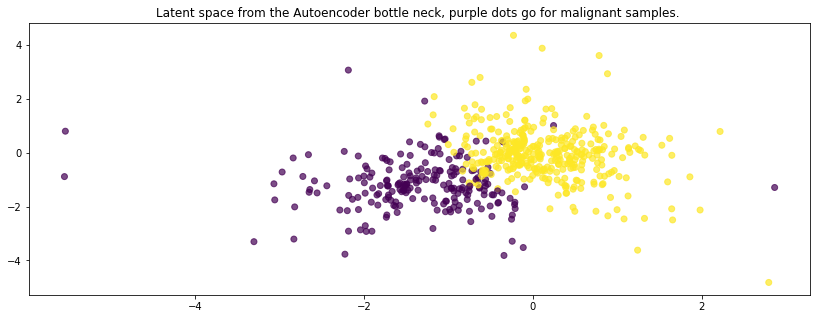

In [157]:
 ### BEGIN Solution
plt.figure(figsize=(14, 5))
net.eval()
enc = net.encoder(torch.from_numpy(X).to(device).float()).detach().cpu() # >>> your solution here <<<
plt.scatter(enc[:,0], enc[:,1], c=cancer_dset['target'], alpha=0.7);
plt.title('Latent space from the Autoencoder bottle neck, purple dots go for malignant samples. ');
 ### END Solution

### Task 2.2.  Autoencoder on kMNIST. (4 points)


We will build the latent representation for `kMRIST` dataset, which you are already familiar with, using our AE network. We will work with the data from `Part 1`.

1. **(2 pt.)** Train AE to get latent representation of the `kMNIST` dataset from `sklearn.datasets()`. Follow the instructions `2.0 - 2.4`. Use `MSE` loss and get < $0.035$ on validation, with AE "bottleneck" < $40$;
2. **(1 pt.)** Plot 10 images and their reconstructions. Plot the latent representation of the whole dataset in 3D, compare visually to your manifold from `Part 1` and upload (pictures) screenshots to this notebook.
3. **(1 pt.)** Get the classification accuracy for the latest features. Use the `KNN` classifier with any hyperparameters you'll choose. Write a couple of sentences comparing the results of `manifold learning` and ` AE`. 
3. **(BONUS 3 pt.)** Sampling from latent representation.

In [115]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np

def load(f):
    return np.load(f)['arr_0']

# Load the data
x_train = load('/content/drive/My Drive/kmnist-train-imgs.npz')
x_test = load('/content/drive/My Drive/kmnist-test-imgs.npz')
y_train = load('/content/drive/My Drive/kmnist-train-labels.npz')
y_test = load('/content/drive/My Drive/kmnist-test-labels.npz')

# Reshape the data and scale


x_train = x_train[:,None,:,:]/ 255 
x_test = x_test[:,None,:,:]/255    

In [117]:
x_train.shape

(60000, 1, 28, 28)

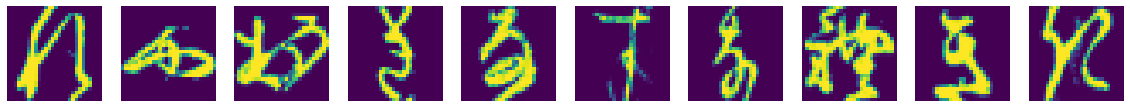

In [118]:
fig, ax = plt.subplots(ncols=10, figsize=(20, 5))
for i in range(10):
    ax[i].imshow(x_train[i].reshape(28,28));
    ax[i].axis('off')

In [0]:
class kMNISTData(torch_data.Dataset):
    def __init__(self, X, y):
        super(kMNISTData, self).__init__()
        self.X = torch.tensor(X, dtype=torch.float32)# >>> your solution here <<<                                                        
        self.y = torch.tensor(y, dtype=torch.float32) # >>> your solution here <<<
    
    def __len__(self):
        return self.X.shape[0]# >>> your solution here <<<
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]# >>> your solution here <<<

In [120]:
train_kmnist = kMNISTData(x_train, y_train) ### YOUR CODE HERE ###
test_kmnist = kMNISTData(x_test, y_test) ### YOUR CODE HERE ###

train_kmnist[1][0].shape

torch.Size([1, 28, 28])

#### 2.0 Create encoder and decoder network for kMNIST. 
You can either use convolutions or flatten the images and use linear layers. You can choose hidden size (not larger than 40) and any architecture you like.

In [0]:
def train(epochs, net, criterion, optimizer, train_loader, val_loader,scheduler=None, verbose=True, save_dir=None):
    net.to(device)
    for epoch in range(1, epochs+1):
        net.train()
        for X, _ in train_loader:
            # >>> your solution here <<<
            X = X.to(device)
            tr_pred = net(X)
            loss = criterion(tr_pred,X)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
        # defining NN evaluation
        net.eval()
        for X, _ in val_loader:
            X = X.to(device)
            val_pred = net(X)
            val_loss = criterion(val_pred,X)
             # >>> your solution here <<<
         
        if scheduler is not None:
            scheduler.step()
        freq = max(epochs//20,1)
        if verbose and epoch%freq==0:
            print('Epoch {}/{} || Loss:  Train {:.4f} | Validation {:.4f}'.format(epoch, epochs, loss.item(), val_loss.item()))

In [0]:

class Unflatten(nn.Module):
    def forward(self, input):
        return input.reshape(input.shape[0],1,28,28)

In [0]:
encoder = lambda hid: nn.Sequential(
  
  nn.Conv2d(1,60,kernel_size=3),
  nn.BatchNorm2d(60),
  nn.ReLU(),
  nn.MaxPool2d(2,2),

  nn.Conv2d(60,200,3),
  nn.BatchNorm2d(200),
  nn.ReLU(),
  nn.MaxPool2d(2,2),

  nn.Flatten(),
  nn.Linear(200*5*5,300),
  nn.BatchNorm1d(300),
  nn.ReLU(),

  nn.Linear(300,hid),
  # nn.BatchNorm1d(hid),
)

decoder = lambda hid: nn.Sequential(
  nn.Linear(hid,600),
  nn.BatchNorm1d(600),
  nn.ReLU(),

  nn.Linear(600,500),
  nn.BatchNorm1d(500),
  nn.ReLU(),

  nn.Linear(500,784),
  nn.Sigmoid(),
  Unflatten(),

)



#### 2.1 Train AE on the kMNIST. 
Your goal is to obtain MSE on the test set < $0.035$ on `MyFirstAE(encoder(40), decoder(40))`.

In [0]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') # >>> your solution here <<<
net = MyFirstAE(encoder(40), decoder(40)) 
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters())             # >>> your solution here <<< lr=0.0001
# scheduler = torch.optim.lr_scheduler.MultiStepLR( optimizer,milestones=(48,50 ),gamma=.1)  # >>> your solution here <<<
# scheduler =  torch.optim.lr_scheduler.MultiStepLR(optimizer, [48, 50], gamma=0.1)  
scheduler = None

train_loader = torch_data.DataLoader(train_kmnist, batch_size=300, shuffle=True) 
val_loader = torch_data.DataLoader(test_kmnist, batch_size=500, shuffle=False) 

In [125]:
epochs = 50 # >>> your solution here <<<
train(epochs, net, criterion, optimizer, train_loader, val_loader, scheduler)

Epoch 2/50 || Loss:  Train 0.0257 | Validation 0.0303
Epoch 4/50 || Loss:  Train 0.0212 | Validation 0.0258
Epoch 6/50 || Loss:  Train 0.0191 | Validation 0.0248
Epoch 8/50 || Loss:  Train 0.0179 | Validation 0.0236
Epoch 10/50 || Loss:  Train 0.0167 | Validation 0.0229
Epoch 12/50 || Loss:  Train 0.0172 | Validation 0.0227
Epoch 14/50 || Loss:  Train 0.0165 | Validation 0.0221
Epoch 16/50 || Loss:  Train 0.0158 | Validation 0.0221
Epoch 18/50 || Loss:  Train 0.0159 | Validation 0.0219
Epoch 20/50 || Loss:  Train 0.0161 | Validation 0.0219
Epoch 22/50 || Loss:  Train 0.0161 | Validation 0.0218
Epoch 24/50 || Loss:  Train 0.0148 | Validation 0.0217
Epoch 26/50 || Loss:  Train 0.0142 | Validation 0.0215
Epoch 28/50 || Loss:  Train 0.0152 | Validation 0.0216
Epoch 30/50 || Loss:  Train 0.0148 | Validation 0.0216
Epoch 32/50 || Loss:  Train 0.0144 | Validation 0.0216
Epoch 34/50 || Loss:  Train 0.0146 | Validation 0.0218
Epoch 36/50 || Loss:  Train 0.0133 | Validation 0.0214
Epoch 38/50 ||

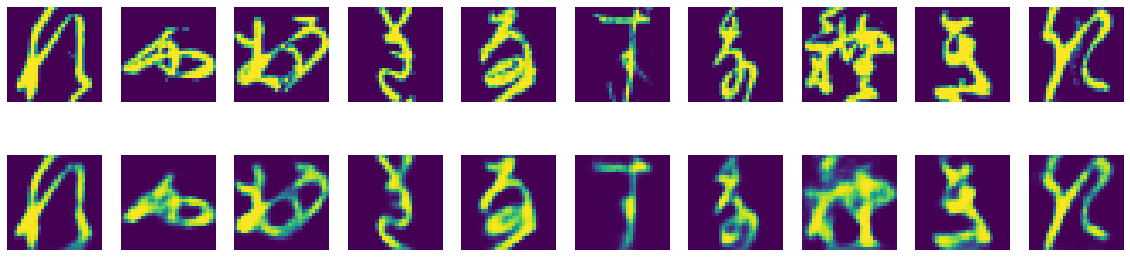

In [126]:
fig, ax = plt.subplots(ncols=10, nrows=2, figsize=(20, 5))
for i in range(10):
    im = train_kmnist[i][0]
    rec = net(im[None,:,:,:].to(device))# >>> your solution here <<<
    ax[0, i].imshow(im[0]);
    ax[1, i].imshow(rec[0][0].detach().cpu() )# >>> your solution here <<<);
    ax[0, i].axis('off')
    ax[1, i].axis('off')

#### 2.2 Plot any 10 images and their reconstructions.

#### 2.3 Plot the latent representation of whole dataset in 3D, compare visually to your manifold from `Part 1` and upload (pictures) screenshoots to this notebook.

In [127]:
### BEGIN Solution
from tqdm import tqdm
# >>> your solution here <<<
emdeddings =[]
X_whole = np.concatenate((x_train,x_test),axis=0)
Y_whole = np.concatenate((y_train,y_test),axis=0)
X_whole = np.array_split(X_whole,50,axis=0)
print(Y_whole.shape)
net.eval()
for i in tqdm(X_whole):
  lat_space = net.encoder(torch.from_numpy(i).to(device).float())
  # print(lat_space.shape)
  emdeddings.append(np.array(lat_space.reshape(lat_space.shape[0],40).cpu().detach()))
### END Solution

  6%|▌         | 3/50 [00:00<00:01, 24.29it/s]

(70000,)


100%|██████████| 50/50 [00:02<00:00, 24.27it/s]


In [128]:
emdeddings = np.concatenate(emdeddings)
emdeddings.shape
print(Y_whole.shape)

(70000,)


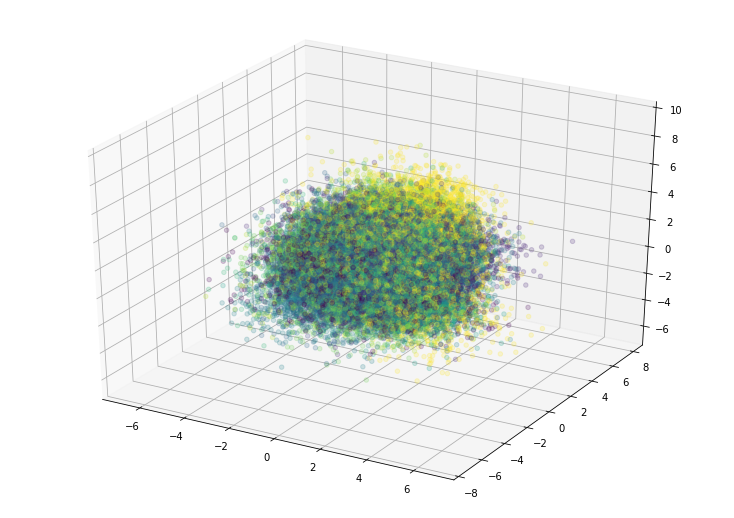

In [129]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(10,7))
ax = Axes3D(fig)
ax.scatter(emdeddings[:,1],emdeddings[:,2],emdeddings[:,3], c=Y_whole,alpha=.2)
plt.show()

In [130]:
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import colorlover as cl
import pandas as pd

init_notebook_mode(connected=True)

In [131]:
Y_whole

array([8, 7, 0, ..., 9, 4, 2], dtype=uint8)

In [132]:
digits_3d = pd.DataFrame({
    'x':emdeddings[:,0], 
    'y':emdeddings[:,1], 
    'z':emdeddings[:,2],
    'label': Y_whole,
})

colors = cl.scales['10']['qual']['Paired']
data = []

for i in range(10):
    x = digits_3d[digits_3d['label'].astype('int') == i]['x']
    y = digits_3d[digits_3d['label'].astype('int') == i]['y']
    z = digits_3d[digits_3d['label'].astype('int') == i]['z']
    
    color = colors[i]
    
    trace = {
        'name': str(i),
        'x': x,
        'y': y,
        'z': z,
        'type': 'scatter3d',
        'mode': 'markers',
        'marker': {
            'size': 5,
            'color': color 
        }
    }
    data.append(trace)

layout = go.Layout(
    title='kMNIST visualization of Autoencoder embeddings ',
    width=900,
    height=600
)

fig = go.Figure(data=data, layout=layout)
fig.show(renderer='colab')
# iplot(fig, show_link = False)

In [0]:
part1_pca = np.array(pd.read_csv('/content/drive/My Drive/PCA_dimreduction.csv'))

part1_3d = pd.DataFrame({
    'x':part1_pca[:,0], 
    'y':part1_pca[:,1], 
    'z':part1_pca[:,2],
    'label': part1_pca[:,3].astype('int'),
})

In [134]:
colors = cl.scales['10']['qual']['Paired']
data = []

for i in range(10):
    x = part1_3d[part1_3d['label'].astype('int') == i]['x']
    y = part1_3d[part1_3d['label'].astype('int') == i]['y']
    z = part1_3d[part1_3d['label'].astype('int') == i]['z']
    
    color = colors[i]
    
    trace = {
        'name': str(i),
        'x': x,
        'y': y,
        'z': z,
        'type': 'scatter3d',
        'mode': 'markers',
        'marker': {
            'size': 5,
            'color': color 
        }
    }
    data.append(trace)

layout = go.Layout(
    title='Digists PCA 100 componests visualization',
    width=900,
    height=600
)

fig = go.Figure(data=data, layout=layout)
fig.show(renderer='colab')   # if you are running this notebook on colab, uncomment this line and comment the next 
# iplot(fig, show_link = False)

#### 2.4 Get the classification accuracy for the latest features. Use the `KNN` classifier with any hyperparameters you'll choose. Write a couple of sentences comparing the results of `manifold learning` and ` AE`. 

In [135]:
### BEGIN Solution

# >>> your solution here <<<
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

y = np.concatenate((y_train,y_test),axis=0)
X_train, X_val, y_train, y_val = train_test_split(emdeddings,y, test_size=0.14, random_state=42, shuffle=True)
clf = KNeighborsClassifier().fit(X_train,y_train)
print("Accuracy for train: ", accuracy_score(y_train,clf.predict(X_train)))
print("Accuracy for test: ",accuracy_score(y_val,clf.predict(X_val)))

### END Solution

Accuracy for train:  0.9860795029817772
Accuracy for test:  0.981838587899194


**Discussion** 


As we racall from the `part1` we used `KNN` classifier to perform classification on digits. Here though we are performing classification on some wierd simbles. I don not know which method of dimentionality reduction would work better for classification if we used the same data but we can clearly see that in this case AutoEncoders are winning. I would argue that this is because Neural Networks can learn very difficult non-linear transformations thus achive better distictions of classes in the latent space.


### BONUS: Sampling from latent space. (3 points)

Imagine, that you want to generate images, using you AE. To do that, you need to sample from the latent space and then decode the result. Of course, we do not know the exact distribution of the latent space. Therefore, let us assume that latent space distribution is Gaussian:

* Encode all the training images into the latent space
* Calculate mean and covariance matrix ($\mu$ and $\Sigma$)
* Sample  $z$ from the $\mathcal{N}(\mu, \Sigma)$
* Decode $z$ from the previous step to obtain an image

Using the procedure described above, sample 10 images and plot them (they should be similar to those of the initial dataset)



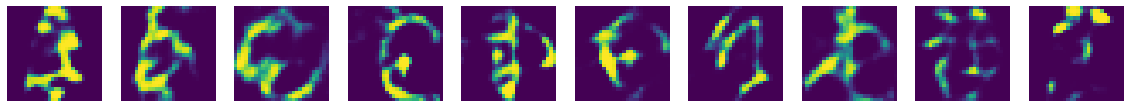

In [136]:
mean = np.mean(emdeddings,axis=0)
sigma = np.std(emdeddings)
cov = np.cov(emdeddings.T,ddof=1)

fig, ax = plt.subplots(ncols=10, figsize=(20, 5))
for i in range(10):
    z = torch.tensor(np.random.multivariate_normal(mean,cov)[None,:]).float().to(device)
    img = net.decoder(z)  
    ax[i].imshow(img[0][0].detach().cpu());
    ax[i].axis('off')

**Yeah, so you can get more than `100%` for the homework, good luck!**

$$ \text{Thank you for your efforts prepering this homework. It tought me a great deal of new things!}$$
